# KNN Model

### Install Libraries
* **`wordcloud`** A word cloud generator in Python that we used to visualize our dataset

In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import random
from collections import defaultdict
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

### Loading Dataset

In [3]:
FILENAME = './HateSpeechDatasetBalanced.csv'
df = pd.read_csv(FILENAME)

print(f"Dataset shape: {df.shape}")
print(f"\nClass distribution:\n{df['Label'].value_counts()}")
print(f"\nFirst few rows:\n{df.head()}")

Dataset shape: (726119, 2)

Class distribution:
Label
1    364525
0    361594
Name: count, dtype: int64

First few rows:
                                             Content  Label
0  denial of normal the con be asked to comment o...      1
1  just by being able to tweet this insufferable ...      1
2  that is retarded you too cute to be single tha...      1
3  thought of a real badass mongol style declarat...      1
4                                afro american basho      1


### Exploratory & Unsupervised Analysis of Dataset
* Histogram of words and their frequency of appearance

In [ ]:
def word_frequencies(texts):
    frequencies = defaultdict(int)
    for text in texts:
        for word in text.split():
            frequencies[word.lower()] += 1
    return frequencies

all_texts = df['Content'].values
all_texts_frequencies = word_frequencies(all_texts)

hate_texts = df[df['Label'] == 1]['Content'].values
hate_texts_frequencies = word_frequencies(hate_texts)

nonhate_texts = df[df['Label'] == 0]['Content'].values
nonhate_texts_frequencies = word_frequencies(nonhate_texts)

print(f"\nTotal unique words in dataset: {len(all_texts_frequencies):,}")
print(f"Total unique words in hateful texts: {len(hate_texts_frequencies):,}")
print(f"Total unique words in non-hateful texts: {len(nonhate_texts_frequencies):,}")


Total unique words in dataset: 141,768
Total unique words in hateful texts: 63,623
Total unique words in non-hateful texts: 121,264


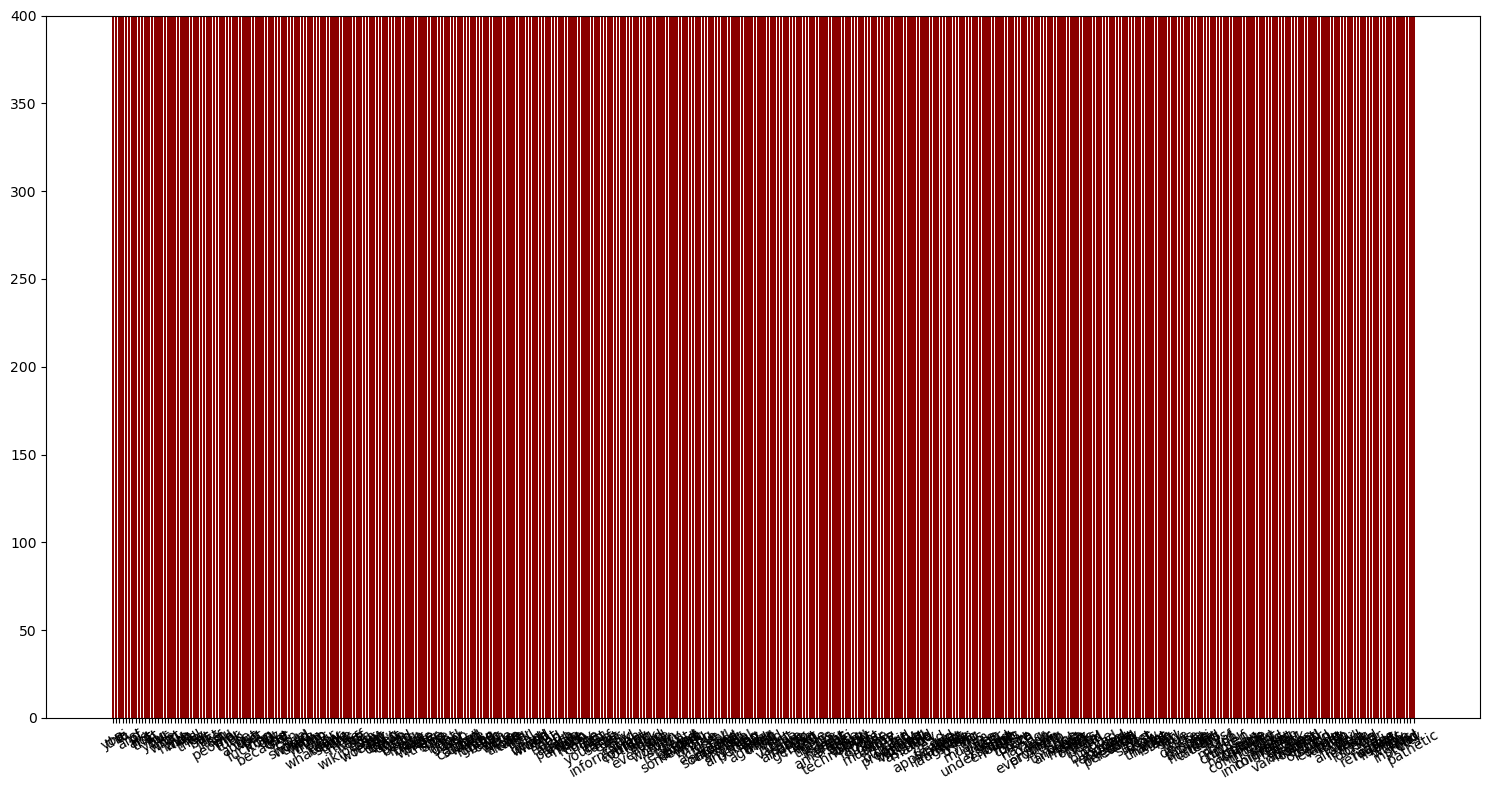

In [11]:
sorted_all = sorted(all_texts_frequencies.items(), key=lambda x: x[1], reverse=True)
sorted_all = sorted_all[:400] # Top 100 words
sorted_hate = sorted(hate_texts_frequencies.items(), key=lambda x: x[1], reverse=True)
sorted_hate = sorted_hate[:400] # Top 400 words
sorted_nonhate = sorted(nonhate_texts_frequencies.items(), key=lambda x: x[1], reverse=True)
sorted_nonhate = sorted_nonhate[:400] # Top 400 words

words = [ item[0] for item in sorted_hate ]
counts = [ item[1] for item in sorted_hate ]


plt.figure(figsize=(15, 8))
plt.bar(words, counts, color='darkred')
# Set the y-axis limit (frequency) to 400
plt.ylim(0, 400)
plt.xticks(rotation=30, ha='center')
plt.tight_layout()
plt.show()


* Word cloud for hateful text (label=1) and non-hateful text (label=0)

### Preprocessing the Data